In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
###Point 1): Load Wine dataset###
wine = datasets.load_wine()

In [3]:
df_data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_target = pd.DataFrame(data=wine.target,columns=['class'])

In [109]:
#Try to preprocess the data but the performances are worse
from sklearn import preprocessing
normalized_X = preprocessing.normalize(df_data,axis=0)
xxx = pd.DataFrame(normalized_X)
xxx.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.074808,0.067656,0.074457,0.073883,0.074201,0.072327,0.067285,0.070899,0.070550,0.068171,0.072916,0.072342,0.069095
std,0.004671,0.032350,0.008632,0.012656,0.010625,0.019723,0.033119,0.024385,0.025382,0.031245,0.017407,0.019666,0.029132
min,0.063469,0.021429,0.042789,0.040172,0.052075,0.030883,0.011273,0.025471,0.018182,0.017251,0.036555,0.035178,0.025718
25%,0.071136,0.046405,0.069533,0.065185,0.065466,0.054912,0.039954,0.052902,0.055433,0.043398,0.059592,0.053668,0.046301
50%,0.075092,0.054007,0.074252,0.073902,0.072905,0.074214,0.070791,0.066617,0.068958,0.063210,0.073491,0.077004,0.062305
75%,0.078703,0.089263,0.080466,0.081482,0.079600,0.088238,0.095327,0.085721,0.086475,0.083561,0.085295,0.087807,0.091122
max,0.085335,0.167956,0.101625,0.113696,0.120516,0.122272,0.168438,0.129316,0.158759,0.175208,0.130227,0.110798,0.155416


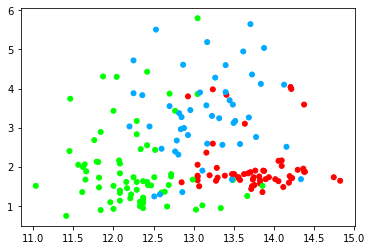

In [5]:
###Point 2): Select the first two attributes for a 2D representation of the image###
colors = ['#FF0000','#00FF00','#00AAFF']
color_point = []
for y in np.array(df_target):
    color_point.append(colors[y[0]])
plt.scatter(df_data.iloc[:,0],df_data.iloc[:,1],s=25,c=color_point)

{0: 59, 1: 71, 2: 48}


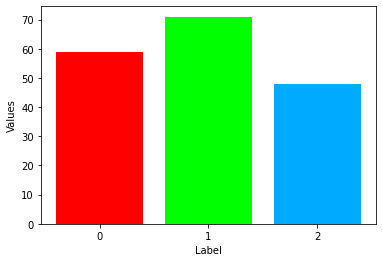

In [39]:
classes = dict()
for y in np.array(df_target):
    if y[0] not in classes:
        classes[y[0]] = 0
    classes[y[0]] = classes[y[0]] + 1
fig, ax = plt.subplots()
plt.bar(classes.keys(),classes.values(),color=colors)
ax.set_ylabel('Values')
ax.set_xlabel('Label')
plt.xticks(np.arange(len(classes.keys())))
print(classes)
#Classes are balanced. This is good

In [172]:
###Point 3): Randomly split data into train, validation and test sets in proportion 5:2:3###
train = 0.5
test = 0.3
validation = (1-test-train) / (1-test)

X_train, X_test, y_train, y_test = train_test_split(np.array(df_data.iloc[:,:2]), np.ravel(df_target), test_size=test, random_state=20)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=validation, random_state=21)

print(f'train {(len(X_train)/len(df_data)):.3f} validation {(len(X_val)/len(df_data)):.3f} train {(len(X_test)/len(df_data)):.3f}')

train 0.494 validation 0.202 train 0.303


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
def train_model(classifier, X_train, X_test, y_train, y_test, print_all=False):
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    if(print_all):
        print(f"#Accurancy: {accuracy_score(y_test, y_pred):.5f}")
        print(f"#f1 Score: {f1_score(y_test, y_pred, average='weighted'):.5f}")

        print(confusion_matrix(y_test,y_pred))      
        print(classification_report(y_test,y_pred))
        print("#--- --- ---")   
    return accuracy_score(y_test, y_pred)

In [128]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
def PlotBoundary(clf,X,y,X_v,y_v,meta):
    
    cmap_light = ListedColormap(['#FFAAAA', '#ABE3FF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00AAFF', '#00FF00'])

    #TODO remove
    h = .0005
    offset_x = 0.006/3
    offset_y = 0.006
    
    h = 0.04
    offset_x = 0.3
    offset_y = 0.5
    
    x_min, x_max = X[:, 0].min() - offset_x, X[:, 0].max() + offset_x
    y_min, y_max = X[:, 1].min() - offset_y, X[:, 1].max() + offset_y
    xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    ax = plt.subplot(111)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    size = 40
    plt.scatter(X[:, 0], X[:, 1],s=size, c=y, cmap=cmap_bold, label='Train')
    plt.scatter(X_v[:, 0], X_v[:, 1],s=size, c=y_v, cmap=cmap_bold, edgecolors='black', linewidth=0.7, label='Test/Validation')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='#00FF00', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Test/Validation', markerfacecolor='#00FF00', markersize=8, markeredgecolor='black', markeredgewidth=1) ]
    
    plt.legend(loc=(1.04,0.8),fontsize=12,handles=legend_elements)
    plt.title(f"{meta}")

    plt.show()

In [140]:
def TrainProcess(model,X_train, X_val, y_train, y_val,meta):
    acc = train_model(model, X_train, X_val, y_train, y_val)
    
    PlotBoundary(model,X_train,y_train,X_val,y_val,meta)
    return acc

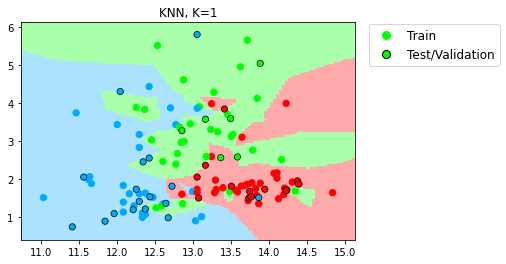

k=1 accurancy= 0.75000


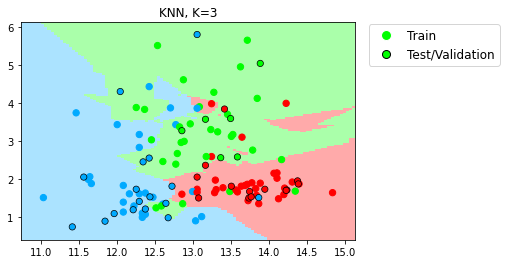

k=3 accurancy= 0.72222


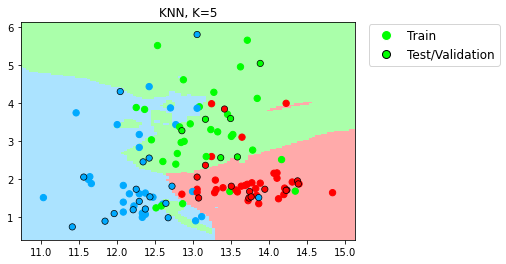

k=5 accurancy= 0.77778


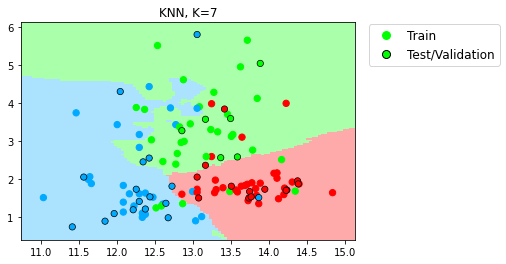

k=7 accurancy= 0.83333


In [173]:
###Point 4): Apply K-Nearest Neighbors with k = [1,3,5,7]###
from sklearn.neighbors import KNeighborsClassifier

K = [1,3,5,7]
K_ext = [1,2,3,4,5,6,7,9,15]
accurancy = dict()
for k in K:
    nbr = KNeighborsClassifier(n_neighbors=k)
    
    meta = "KNN, K=" + str(k)
    acc = TrainProcess(nbr, X_train, X_val, y_train, y_val,meta)
    
    accurancy[k] = acc
    print(f'k={k} accurancy= {acc:.5f}')

In [123]:
def PlotAccurancy(accurancy):
    fig = plt.figure()
    fig.suptitle('Accurancy Validation Set', fontsize=20)
    plt.xlabel('K value', fontsize=18)
    plt.ylabel('Accurancy', fontsize=16)
    plt.plot(list(accurancy.keys()),list(accurancy.values()) )
    plt.scatter(list(accurancy.keys()),list(accurancy.values()),color=(0,0,0,0),s=100,edgecolors='g', linewidth=1)

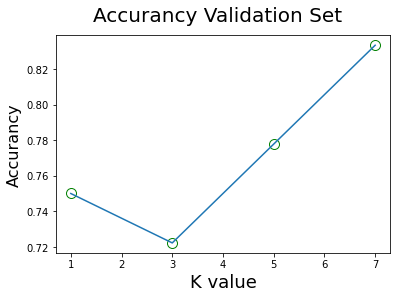

In [174]:
###Point 5): Plot a graph showing how the accuracy on the validation set varies when changing K###
PlotAccurancy(accurancy)

###Point 6): How the boundaries change? Why?###
#The boundaries changes according to the number k: increasing k we accept to mis-classify some points in order to improve the performance

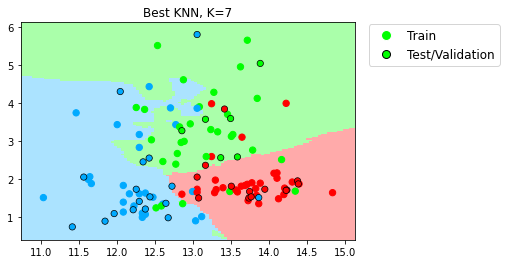

Test with k: 7 accurancy: 0.85185 (Best Validation: 0.83333)


In [175]:
###Point 7): Use the best value of K and evaluate the model on the test set. How well does it works?###
best_k = [key  for (key, value) in accurancy.items() if value == max(accurancy.values())][0]

nbr = KNeighborsClassifier(n_neighbors=best_k)
    
meta = "Best KNN, K=" + str(best_k)
acc = TrainProcess(nbr, X_train, X_val, y_train, y_val,meta)

print(f'Test with k: {best_k} accurancy: {accu:.5f} (Best Validation: {accurancy[best_k]:.5f})')

#It works well: the performance on the test set are good and they are slightly better than the validation set

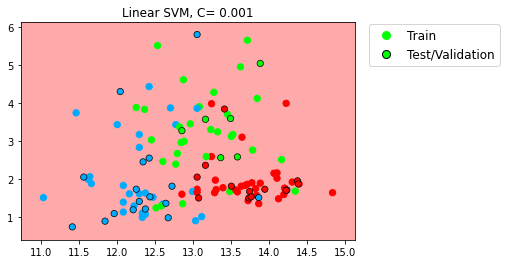

C= 0.001 accurancy= 0.36111


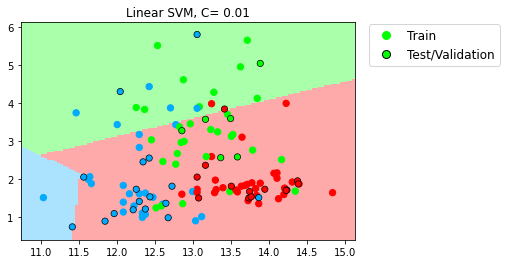

C= 0.01 accurancy= 0.38889


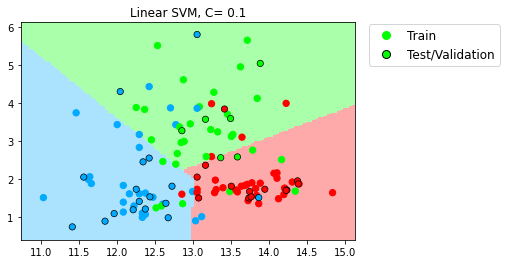

C= 0.1 accurancy= 0.83333


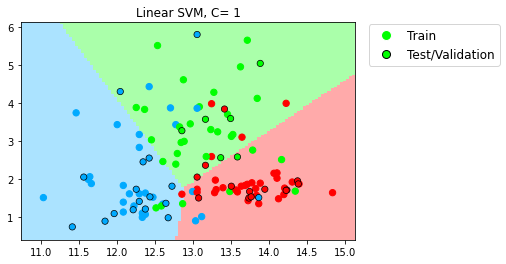

C= 1 accurancy= 0.80556


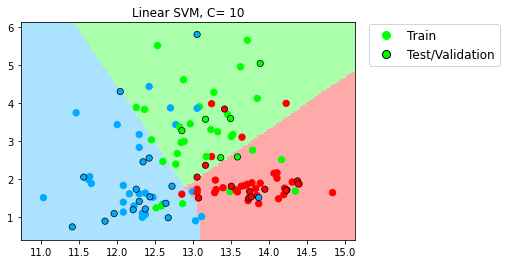

C= 10 accurancy= 0.80556


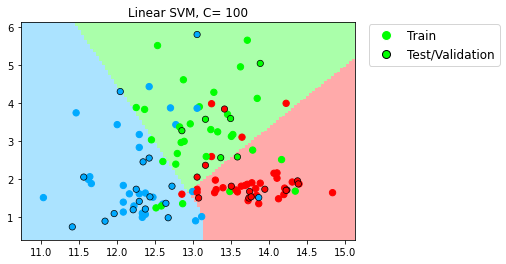

C= 100 accurancy= 0.80556


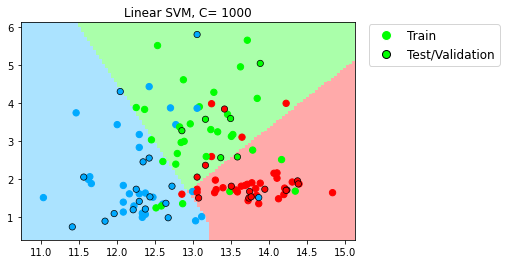

C= 1000 accurancy= 0.83333


In [176]:
###Point 8): Apply Linear SVM with C = [0.001, 0.01, 0.1, 1, 10, 100,1000]###
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accurancySVM = dict()
for c in C:
    Lsvm = SVC(kernel='linear', C=c, random_state=0, tol=1e-4)
    
    meta = "Linear SVM, C= " + str(c)
    acc = TrainProcess(Lsvm, X_train, X_val, y_train, y_val,meta)
    
    accurancySVM[c] = acc
    print(f'C= {c} accurancy= {acc:.5f}')

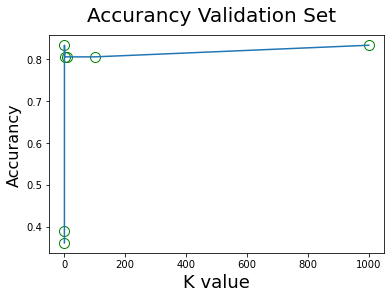

In [183]:
###Point 9): Plot a graph showing how the accuracy on the validation set varies when changing C###

#Not really readable
PlotAccurancy(accurancySVM)

#This should be better (Remove if statement!)
if(False):
    value = 1
    accurancySVM1 = {k:v for (k,v) in accurancySVM.items() if k<=value}
    accurancySVM2 = {k:v for (k,v) in accurancySVM.items() if k>value}
    PlotAccurancy(accurancySVM1)
    PlotAccurancy(accurancySVM2)

###Point 10): How the boundaries change? Why?###
#With a low c the boundaries are very bad.
#They represent better the data with c increasing, since higher c penalize more mis-classified data

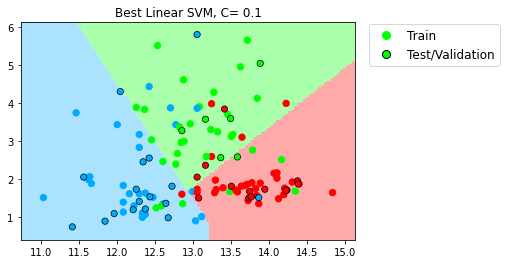

Test with k= 0.1 accurancy= 0.83333 (Best Validation: 0.83333)


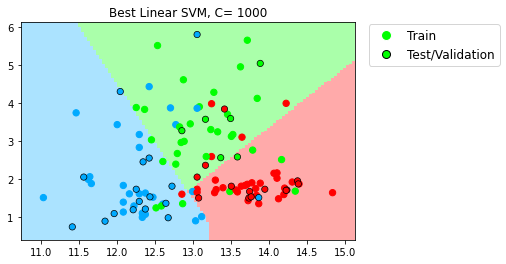

Test with k= 1000 accurancy= 0.83333 (Best Validation: 0.83333)


In [180]:
###Point 11): Use the best value of C and evaluate the model on the test set. How well does it works?###
best_c = [key  for (key, value) in accurancySVM.items() if value == max(accurancySVM.values())]

for c in best_c:
    svm = SVC(kernel='linear', C=c, random_state=0, tol=1e-4)
    
    meta = "Best Linear SVM, C= " + str(c)
    acc = TrainProcess(Lsvm, X_train, X_val, y_train, y_val,meta)
    
    print(f'Test with k= {c} accurancy= {acc:.5f} (Best Validation: {accurancySVM[c]:.5f})')

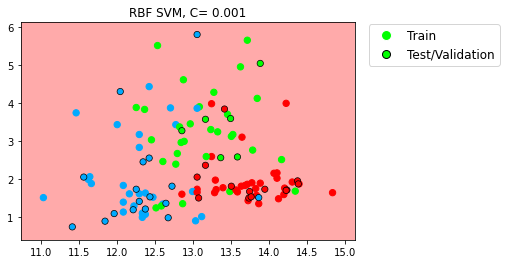

C= 0.001 accurancy= 0.36111


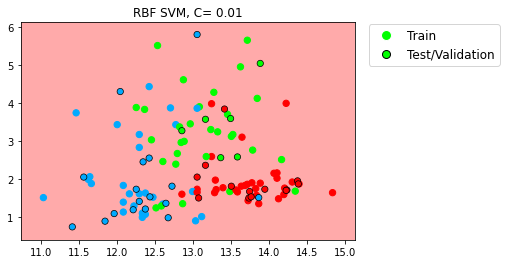

C= 0.01 accurancy= 0.36111


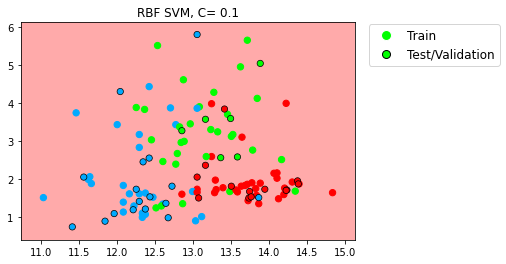

C= 0.1 accurancy= 0.36111


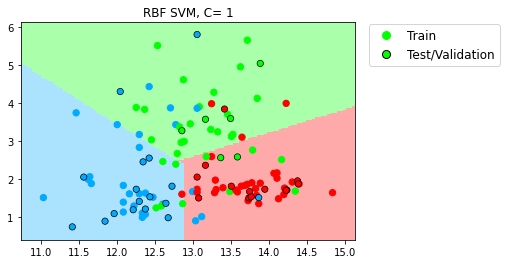

C= 1 accurancy= 0.83333


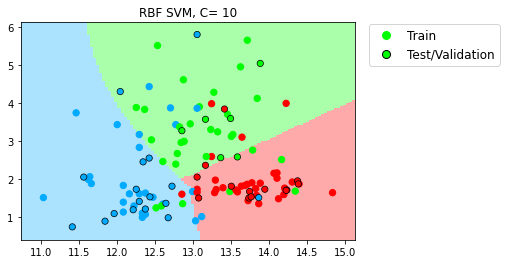

C= 10 accurancy= 0.83333


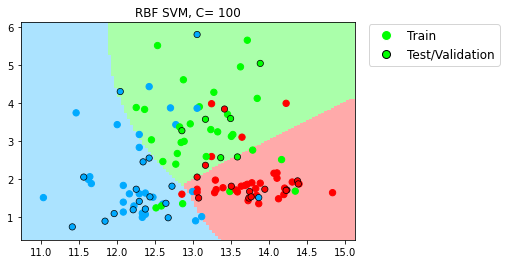

C= 100 accurancy= 0.83333


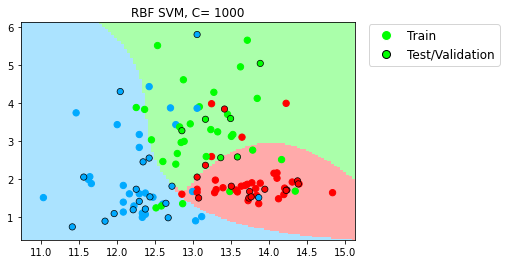

C= 1000 accurancy= 0.83333


In [181]:
###Point 12): Apply RBF with C = [0.001, 0.01, 0.1, 1, 10, 100,1000]###
from sklearn.svm import SVC

accurancyRBF = dict()
for c in C:
    RBFsvm = SVC(kernel='rbf', C=c, random_state=0, tol=1e-4)
    
    meta = "RBF SVM, C= " + str(c)
    acc = TrainProcess(RBFsvm, X_train, X_val, y_train, y_val,meta)
    
    accurancyRBF[c] = acc
    print(f'C= {c} accurancy= {acc:.5f}')

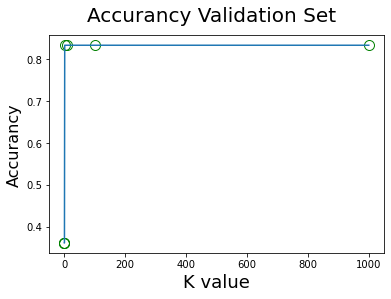

In [185]:
PlotAccurancy(accurancyRBF)

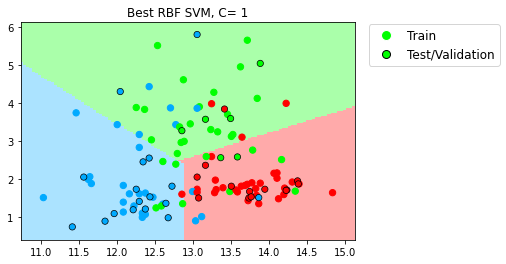

Test with k= 1 accurancy= 0.83333 (Best Validation: 0.83333)


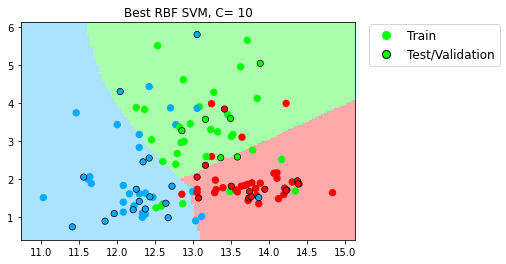

Test with k= 10 accurancy= 0.83333 (Best Validation: 0.83333)


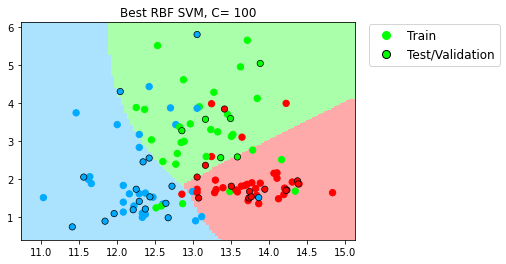

Test with k= 100 accurancy= 0.83333 (Best Validation: 0.83333)


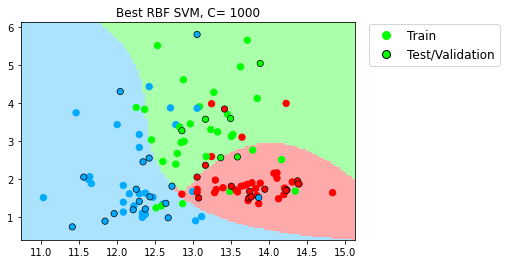

Test with k= 1000 accurancy= 0.83333 (Best Validation: 0.83333)


In [184]:
###Point 13): Plot a graph showing how the accuracy on the validation set varies when changing C###
best_c = [key  for (key, value) in accurancyRBF.items() if value == max(accurancyRBF.values())]

for c in best_c:
    svm = SVC(kernel='rbf', C=c, random_state=0, tol=1e-4)
    
    meta = "Best RBF SVM, C= " + str(c)
    acc = TrainProcess(svm, X_train, X_val, y_train, y_val,meta)
    
    print(f'Test with k= {c} accurancy= {acc:.5f} (Best Validation: {accurancyRBF[c]:.5f})')
###Point 14): Are there any differences compared to the linear kernel? How are the boundaries different?###
#With low values of C rbf and linear kernel classifier boundaries are similar.
#Then the boundaries start to be non linear and try to enclose the data points

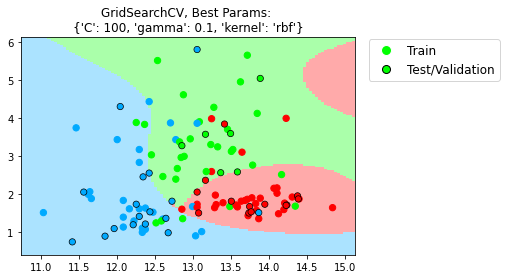

accurancy= 0.80556


In [190]:
###Point 15): Perform a grid search of the best parameters for an RBF kernel: we will now tune both gamma and C at the same time.###
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C': [0.1, 1, 10, 100,1000]}
RBFsvc_CV = GridSearchCV(SVC(), tuned_parameters, verbose=0)

acc = train_model(RBFsvc_CV, X_train, X_val, y_train, y_val)

meta = "GridSearchCV, Best Params: \n" + str(RBFsvc_CV.best_params_)
PlotBoundary(RBFsvc_CV,X_train,y_train,X_val,y_val,meta)

print(f'accurancy= {acc:.5f}')

In [192]:
###Point 16):  Merge the training and validation split. You should now have 70% training and 30% test data.###

#Just merging the sets gives some problems of indexes
X_train = np.concatenate([X_train,X_val])
y_train = np.concatenate([y_train,y_val])

print(f'train {(len(X_train)/len(df_data)):.3f} train {(len(X_test)/len(df_data)):.3f}')

train 0.899 train 0.303


In [198]:
###Point 17): Repeat the grid search for gamma and C but this time perform 5-fold validation.###
from sklearn.model_selection import KFold
k_fold = 5
kf = KFold(n_splits=k_fold)

RBFsvc_CV_kfold = GridSearchCV(SVC(), tuned_parameters, verbose=0)

mean = 0
for train_index, test_index in kf.split(X_train):
    acc = train_model(RBFsvc_CV_kfold, X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index])
    print(f'accurancy= {acc:.5f}')
    mean = mean + acc
    
mean = mean/k_fold
print(f'Mean: {mean:.5f}')

accurancy= 0.87500
accurancy= 0.59375
accurancy= 0.78125
accurancy= 0.87500
accurancy= 0.87500
Mean: 0.80000


Text(33.0, 0.5, 'Gamma')

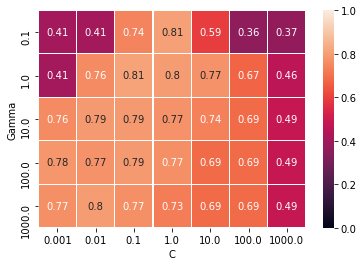

In [194]:
import seaborn as sns
scores = RBFsvc_CV_kfold.cv_results_['mean_test_score'].reshape(len(tuned_parameters['C']),len(tuned_parameters['gamma']))

pd_scores = pd.DataFrame(scores, index=tuned_parameters['C'], columns=tuned_parameters['gamma'])
sns.heatmap(pd_scores, vmin=0, vmax=1, linewidths=.1, annot=True,xticklabels='auto', yticklabels='auto')
plt.xlabel("C")
plt.ylabel("Gamma")

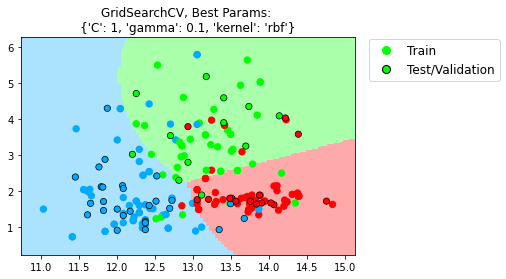

Test with k= 1000 accurancy= 0.87500 (Last accurancy (Mean): 0.8)


In [199]:
###Point 18): Evaluate the parameters on the test set. Is the final score different? Why?###

meta = "GridSearchCV, Best Params: \n" + str(RBFsvc_CV_kfold.best_params_)
PlotBoundary(RBFsvc_CV_kfold,X_train,y_train,X_test,y_test,meta)

print(f'Test with k= {c} accurancy= {acc:.5f} (Last accurancy (Mean): {mean})')

#The score are different and (strangely) they are better wrt the 'validation' set